Now that we are done with making some basic sense, we will try to properly study our data

In [1]:
import pandas as pd
import numpy as np
from io import StringIO


In [2]:
Train = pd.read_csv("Data/train.csv")
Test = pd.read_csv("Data/test.csv")

In [7]:
Train.drop('icu_id', axis=1, inplace=True)
Test.drop('icu_id', axis=1, inplace=True)
Train.drop('gender', axis=1, inplace=True)
Test.drop('gender', axis=1, inplace=True)

In [8]:
Train.drop('apache_3j_bodysystem', axis=1, inplace=True)
Test.drop('apache_3j_bodysystem', axis=1, inplace=True)


In [9]:
Train.isnull().sum()    

RecordID                            0
hospital_id                         0
ethnicity                         576
icu_admit_source                   47
icu_stay_type                       0
icu_type                            0
apache_2_bodysystem               276
age                              1801
elective_surgery                    0
pre_icu_los_days                    0
apache_2_diagnosis                276
apache_3j_diagnosis                64
apache_post_operative               0
gcs_eyes_apache                   405
gcs_motor_apache                  405
gcs_unable_apache                  42
gcs_verbal_apache                 405
heart_rate_apache                   2
intubated_apache                    0
resprate_apache                    62
temp_apache                      1249
ventilated_apache                   0
d1_diasbp_min                       0
d1_diasbp_noninvasive_min           0
d1_heartrate_max                    0
d1_mbp_min                          0
d1_mbp_nonin

In [3]:
#fill missing values with mean column values in the train set
Train.fillna(Train.mean(), inplace=True)

C:\Users\hamza\AppData\Local\Temp\ipykernel_9400\193755595.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Train.fillna(Train.mean(), inplace=True)


In [4]:
#do same for test
Test.fillna(Test.mean(), inplace=True)

C:\Users\hamza\AppData\Local\Temp\ipykernel_9400\613143999.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Test.fillna(Test.mean(), inplace=True)


In [12]:
#for categorical data fill with mode
Train.fillna(Train.mode().iloc[0], inplace=True)
Test.fillna(Test.mode().iloc[0], inplace=True)

In [13]:
#do one hot encoding on train data
Train = pd.get_dummies(Train, columns=['ethnicity', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_2_bodysystem'])

In [14]:
#do same one hote encoding on test data
Test = pd.get_dummies(Test, columns=['ethnicity', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_2_bodysystem'])

In [15]:
#count 0 and 1 in hospital_death column
Train['hospital_death'].value_counts()


0    45662
1     4338
Name: hospital_death, dtype: int64

In [5]:
#drop all categorical data
categorical_data = Train.select_dtypes(exclude=[np.number])
categorical_dataTest = Test.select_dtypes(exclude=[np.number])

In [13]:
Train=Train.drop(categorical_data,axis=1)
Test=Test.drop(categorical_data,axis=1)
#d.drop(categorical_data,axis=1)
#d

In [11]:
#make a X for features and y for target
X = Train.drop('hospital_death', axis=1)
y = Train['hospital_death']


In [54]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create an Extra Trees Regressor
reg = ExtraTreesRegressor(n_estimators=100, random_state=0)

# Fit the model on the training data
reg.fit(X_train, y_train)

# Make predictions on the test data
# Make predictions on the preprocessed test data using the trained Extra Trees Regressor model
predictions = reg.predict(X_test)

# Print the predictions
print(predictions)


[ 41.5268291  -18.60358095  13.08900475 -32.44873452  32.56732509
   8.95989436  -9.97068236  -6.33559021  13.31987805 -19.0443794
   2.90019939 -48.03170969 -40.58996056 -52.03486258  81.12855354
 -29.87422557  17.91400784  52.00752226 -14.24367136 -62.26913138
  -1.47572514 -61.4076224   20.67811696  26.11724728 -58.58235502
 -40.51031592 -13.73814267  58.88723004  17.16919435  -0.87723265]


In [17]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Assuming 'target' is the name of your target variable
X_train = Train.drop('hospital_death', axis=1)
y_train = Train['hospital_death']

# Fit the model on the training data
reg = ExtraTreesRegressor(n_jobs=100, random_state=0)
reg.fit(X_train, y_train)

# Make predictions on the test data
# Note: You should preprocess your test data in the same way as your training data
X_test = Test  # Replace with your test features
predictions = reg.predict(X_test)

# Print the predictions
print(predictions)

[0.   0.49 0.11 ... 0.   0.03 0.02]


In [59]:
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(predictions, columns=['hospital_death'])

# Add the record ID from the test data to the predictions DataFrame
predictions_df.insert(0, 'RecordID', Test['RecordID'])

# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

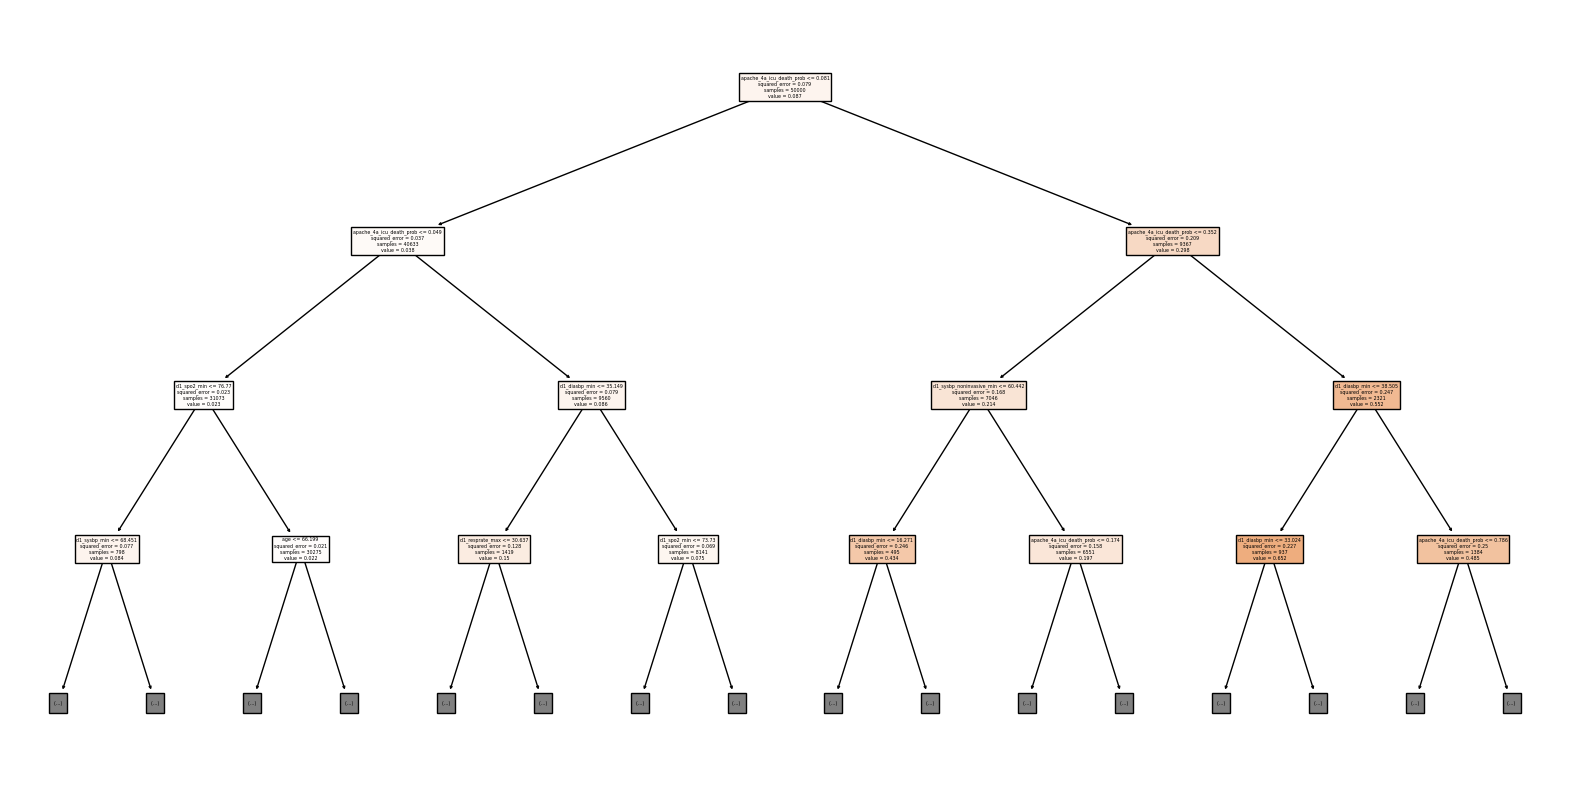

In [24]:
from sklearn.tree import plot_tree

# Assuming 'X_train' is your preprocessed training data
X_train = Train.drop('hospital_death', axis=1)
y_train = Train['hospital_death']

# Assuming 'reg' is your trained ExtraTreesRegressor model
reg = ExtraTreesRegressor(n_estimators=100, random_state=0)

# Fit the model on the training data
reg.fit(X_train, y_train)

# Get a single decision tree from the ensemble
tree = reg.estimators_[0]

# Get the feature names from the trained model
feature_names = X_train.columns.tolist()

# Assuming 'max_depth' is the maximum depth of the tree you want to visualize
plt.figure(figsize=(20,10))
plot_tree(tree, max_depth=3, feature_names=feature_names, filled=True)
plt.show()


In [14]:
#now i want to run knearest neightour machine learning model on this prepared data
#first we will split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)


In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

def fit_model(model, model_name):
    model.fit(X_train,y_train)
    md_probs = model.predict_proba(X_test)
    md_probs = md_probs[:,1]
    md_auc = roc_auc_score(y_test, md_probs)
    print(model_name, " : ", md_auc)
    md_fpr, md_tpr, _ = roc_curve(y_test, md_probs)
    pyplot.plot(md_fpr, md_tpr, marker='.', label=model_name)
    #return (md_fpr, md_tpr)

Depth 5 Split 2  :  0.8496630455867317
Depth 7 Split 2  :  0.8425857880479268
Depth 5 Split 5  :  0.8496630455867317
Depth 7 Split 5  :  0.8442223497967656
Depth 3 Split 2  :  0.8363197555211981
Depth 3 Split 5  :  0.8363197555211981


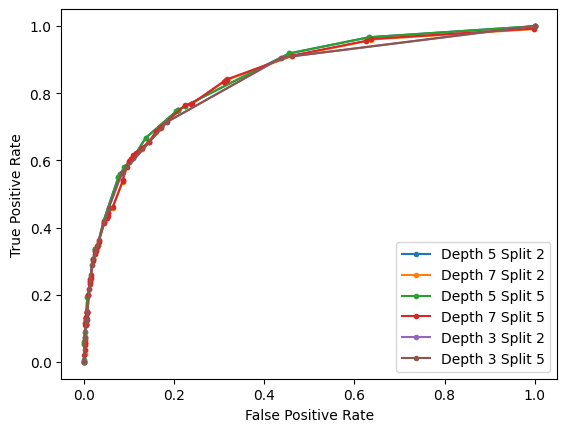

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier

dt_5_2 = DecisionTreeClassifier(max_depth=5, min_samples_split= 10)  
fit_model(dt_5_2, "Depth 5 Split 2") #BEST

dt_7_2 = DecisionTreeClassifier(max_depth=7)  
fit_model(dt_7_2, "Depth 7 Split 2") 

dt_5_5 = DecisionTreeClassifier(max_depth=5, min_samples_split=5)  
fit_model(dt_5_5, "Depth 5 Split 5") #BEST

dt_7_5 = DecisionTreeClassifier(max_depth=7, min_samples_split=5)  
fit_model(dt_7_5, "Depth 7 Split 5") 

dt_3_2 = DecisionTreeClassifier(max_depth=3, min_samples_split=2)  
fit_model(dt_3_2, "Depth 3 Split 2") 

dt_3_5 = DecisionTreeClassifier(max_depth=3, min_samples_split=5)  
fit_model(dt_3_5, "Depth 3 Split 5") 

#kn = KNeighborsClassifier(n_neighbors=5)
#fit_model(kn, "k-NN")

#pipe_kn = Pipeline([("scaler", MinMaxScaler()), ("knr", KNeighborsClassifier(n_neighbors=5))])

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


In [22]:
#predicitng using grid searches best model
hospital_death = dt_5_2.predict(Test)


# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(hospital_death, columns=['hospital_death'])

# Add the record ID from the test data to the predictions DataFrame
predictions_df.insert(0, 'RecordID', Test['RecordID'])

# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)